<h2>Path to test data</h2>

In [1]:
import numpy as np
import glob
import os

import cv2
import numpy as np
import tqdm
import logging
from matplotlib.animation import ArtistAnimation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.manifold import TSNE
from tqdm import tqdm

datapath_hulk2 = '../test_data/Hulc2/datatest/hulc_2_episode.npz'
datapath_hulk2_dir = '../test_data/Hulc2/datatest'
datapath_hulk2_an = '../test_data/Hulc2/single/auto_lang_ann.npy'
datapath_hulk2_an_mult = '../test_data/Hulc2/multi/auto_lang_ann.npy'
datapath_ep_lens = '../test_data/Hulc2/ep_lens.npy'
datapath_ep_start_end_ids = '../test_data/Hulc2/ep_start_end_ids.npy'

data_path_full = "/media/tim/D/datasets/hulc2/unprocessed/real_world/500k_all_tasks_dataset_15hz"

<h3> Test if Data if working </h3>

In [2]:
d_hulk = np.load(datapath_hulk2, allow_pickle=True)
print(list(d_hulk.keys()))

print(d_hulk["actions"])

['actions', 'rel_actions_world', 'rel_actions_gripper', 'robot_obs', 'rgb_static', 'depth_static', 'rgb_gripper', 'depth_gripper']
[ 0.31737219 -0.0062298   0.43991384 -3.09091585  0.00391931  0.0156081
  1.        ]


In [21]:
# d_hulk_ann = np.load(datapath_hulk2_an, allow_pickle=True)

d_hulk_ann = np.load(datapath_hulk2_an, allow_pickle=True).reshape(-1)[0]
d_hulk_ann

# np.squeeze(d_hulk_ann["language"]["emb"])

#print(d_hulk_ann["language"]["emb"][0])
print(d_hulk_ann["language"]["task"][54])
print(d_hulk_ann["info"]["indx"][54])
print(d_hulk_ann["language"]["emb"][54])

print(len(d_hulk_ann["language"]["task"]))
print(len(d_hulk_ann["language"]["emb"]))
print(len(d_hulk_ann["info"]["indx"]))


# d_hulk_ann = np.load(datapath_hulk2_an_mult, allow_pickle=True)
# d_hulk_ann

place_yellow_drawer_top
(20961, 21025)
[[-0.38922822  0.1494553   0.0239097  -0.03678728 -0.1484833  -0.00542468
   0.3273134   0.3559373   0.52274704 -0.6505218   0.13515905  0.5648616
   0.215478    0.00145402 -0.02869894 -0.17435911  0.01497278  0.22213031
  -0.11780678  0.16087767  0.42047313  0.16388613  0.11060517  0.29321435
  -0.18563269  0.06868439  0.07459813 -0.17093252  0.10922515 -0.1105642
  -0.04661695  0.3919795   0.03154283 -0.20887108  0.22681214 -0.5485923
  -0.01577348 -0.10701358  0.37242317  0.34940502 -0.07511472  0.07940333
   0.18046492 -0.45167026 -0.5700471   0.02134322  0.34975317  0.12040555
   0.30040732 -0.303599   -0.03591662  0.26108557 -0.3183324   0.17721924
  -0.18067726  0.02455653 -0.04083814  0.02886025  0.48874313 -0.26494902
  -0.09237493  0.30716586  0.21235067  0.32615882 -0.11148506 -0.1943274
  -0.09562469 -0.01280283 -0.09855368 -0.11726558  0.18315698  0.03758955
  -0.09367383 -0.2013392   0.5508225   0.14537777 -0.18701297 -0.3853593
   0

In [5]:
d_hulk_ep_lens = np.load(datapath_ep_lens)
d_hulk_ep_lens

array([ 2207, 11824,  7545,  6154, 12127, 10627,  8432,  7754,  6077,
        3889,  8318,  5142,  5633,  7065,  5022,  2113, 17786, 12006,
        1490,  5320,  7606,  9468,  6346,  5234, 11894,  5691,  9535,
        1831,  3509,  1889,  1466,  5885,  4901,  8353,  5343,  5835,
       14443, 14326,  6674,  7617, 14503,  2644,  5382,  5594,  4850,
        4079,  9082, 11959,  7705,  7301,  3506,  3613,  8320,  4479,
         269,  5533,  2776,  3356,  4559,   420,  3847,    34,  3500,
         469,  5258,   669, 18994,  1273,  8602,  6017,  9335,  1083,
        4198,  1817,  3566,  3316,  8539,  1516,  8903,  2963,  6067,
        5342,   594])

In [6]:
d_hulk_ep_start_end_ids = np.load(datapath_ep_start_end_ids)
d_hulk_ep_start_end_ids

array([[ 14031,  21575],
       [ 21576,  27729],
       [ 27730,  39856],
       [ 39857,  50483],
       [ 50484,  58915],
       [ 58916,  66669],
       [ 66670,  72746],
       [ 72747,  76635],
       [ 76636,  84953],
       [ 84954,  90095],
       [ 90096,  95728],
       [ 95729, 102793],
       [102794, 107815],
       [107816, 109928],
       [109929, 127714],
       [127715, 139720],
       [139721, 141210],
       [141211, 146530],
       [146531, 154136],
       [154137, 163604],
       [163605, 169950],
       [169951, 175184],
       [175185, 187078],
       [187079, 192769],
       [192770, 202304],
       [202305, 204135],
       [204136, 207644],
       [207645, 209533],
       [209534, 210999],
       [211000, 216884],
       [216885, 221785],
       [221786, 230138],
       [230139, 235481],
       [235482, 241316],
       [241317, 255759],
       [255760, 270085],
       [270086, 276759],
       [276760, 284376],
       [284377, 298879],
       [298880, 301523],


<h2>Visualize Data</h2>

<h3>Real World</h3>

In [4]:
def normalize_depth(img):
    img_mask = img == 0
    istats = (np.min(img[img > 0]), np.max(img))
    imrange = (img.astype("float32") - istats[0]) / (istats[1] - istats[0])
    imrange[img_mask] = 0
    imrange = 255.0 * imrange
    imsz = imrange.shape
    nchan = 1
    if len(imsz) == 3:
        nchan = imsz[2]
    imgcanvas = np.zeros((imsz[0], imsz[1], nchan), dtype="uint8")
    imgcanvas[0 : imsz[0], 0 : imsz[1]] = imrange.reshape((imsz[0], imsz[1], nchan))
    return imgcanvas


# Ger valid numpy files with raw data
def get_files(path, extension, recursive=False):
    if not os.path.isdir(path):
        print("path does not exist: %s" % path)
    search_str = "/*.%s" % extension if not recursive else "**/*.%s" % extension
    files = glob.glob(path + search_str)
    if not files:
        print("No *.%s files found in %s" % (extension, path))
    files.sort()
    return files


def viz_data(data_dir, start_epi=0, end_epi=0):
    """Visualize teleop data recorded with Panda robot and check actions are valid"""
    files = get_files(data_dir, "npz", recursive=True)  # Sorted files
    # Remove camera calibration npz from iterable files
    files = [f for f in files if "camera_info.npz" not in f]

    for idx, filename in enumerate(tqdm(files)):
        data = np.load(filename, allow_pickle=True)

        if(start_epi != 0 and end_epi != 0):
            epi_filename = int(filename[-11:-4])
            if(epi_filename < start_epi):
                continue
            if(end_epi < epi_filename):
                return
                

        if data is None:
            continue  # Skip file

        new_size = (400, 400)
        for key in ["rgb_static", "depth_static", "rgb_gripper", "depth_gripper"]:
            img = cv2.resize(data[key], new_size)
            if "rgb" in key:
                cv2.imshow(key, img[:, :, ::-1])
            else:
                img2 = normalize_depth(img)
                img2 = cv2.applyColorMap(img2, cv2.COLORMAP_JET)
                cv2.imshow(key, img2)
        cv2.waitKey(10)


In [70]:
index = 100
print(d_hulk_ann["language"]["task"][index])
print(d_hulk_ann["info"]["indx"][index])
viz_data(data_path_full, d_hulk_ann["info"]["indx"][index][0], d_hulk_ann["info"]["indx"][index][1])

turn_off_blue_led
(21486, 21550)


  2%|▏         | 7520/449507 [00:02<02:10, 3374.75it/s]


<h3>Visualize Embeddings</h3>

In [10]:

def generate_task_id(tasks):
    labels = list(sorted(set(tasks)))
    task_ids = [labels.index(task) for task in tasks]
    return task_ids

def visualize_embeddings(data, with_text=True):
    # emb = data["language"]["emb"].squeeze()
    emb = data["language"]["emb"]
    emb = np.squeeze(emb)

    tsne_emb = TSNE(n_components=2, random_state=40, perplexity=20.0).fit_transform(emb)

    emb_2d = tsne_emb

    task_ids = generate_task_id(data["language"]["task"])
    # print(data["language"]["task"])
    # print(task_ids)

    # ??? not enough colors
    # cmap = ["orange", "blue", "green", "pink", "brown", "black", "purple", "yellow", "cyan", "red", "grey", "olive"]

    cmap = cm.rainbow(np.linspace(0, 1, 55))

    ids_in_legend = []
    for i, task_id in enumerate(task_ids):
        if task_id not in ids_in_legend:
            ids_in_legend.append(task_id)
            plt.scatter(emb_2d[i, 0], emb_2d[i, 1], color=cmap[task_id], label=data["language"]["task"][i])
            if with_text:
                plt.text(emb_2d[i, 0], emb_2d[i, 1], data["language"]["ann"][i])
        else:
            plt.scatter(emb_2d[i, 0], emb_2d[i, 1], color=cmap[task_id])
            if with_text:
                plt.text(emb_2d[i, 0], emb_2d[i, 1], data["language"]["ann"][i])
    plt.legend()
    plt.title("Language Embeddings")
    plt.show()

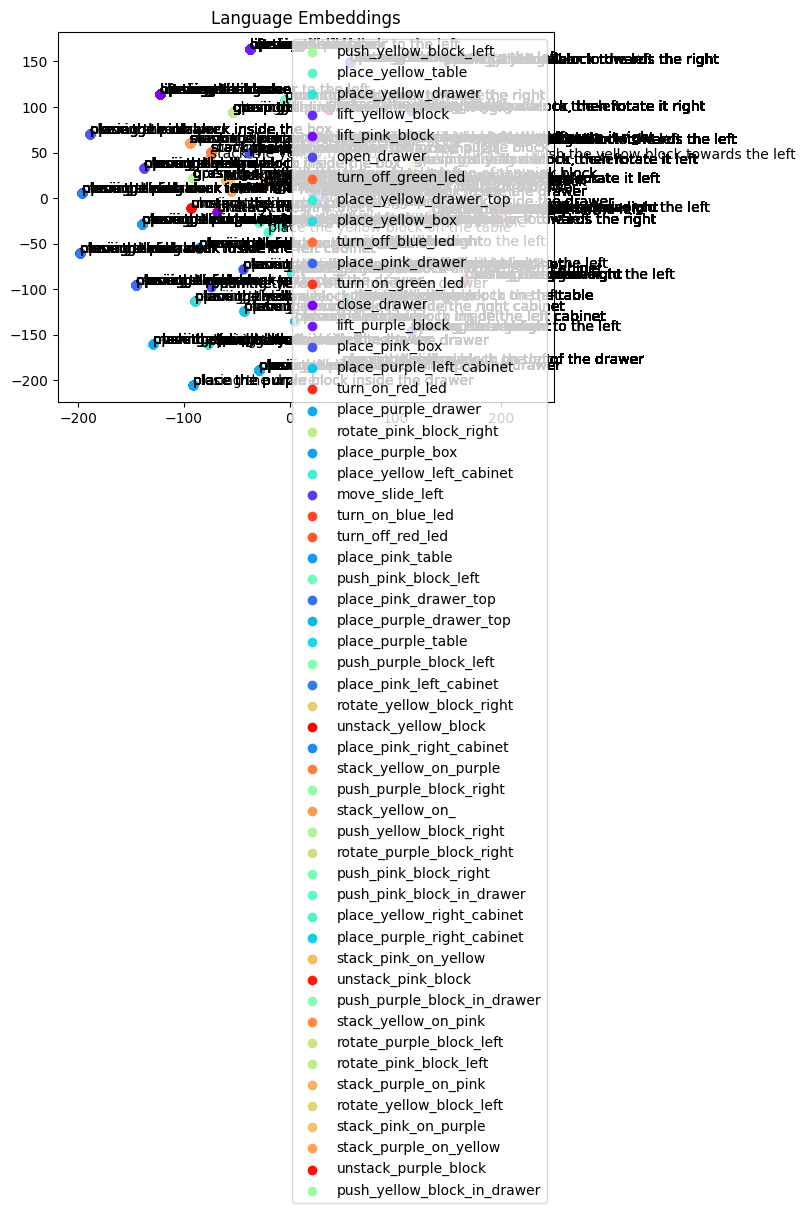

In [11]:
visualize_embeddings(d_hulk_ann)

<h2> Train Captioning first attempt </h2>

<h3> find longest image sequence</h3>

In [35]:
print((d_hulk_ann["info"]["indx"][1][1]) - (d_hulk_ann["info"]["indx"][1][0]))
for x in d_hulk_ann["info"]["indx"]:
    if((x[1] - x[0]) != 64):
        print("data length varies")

64
